# Veri Bilimi için İstatistik

## Temel İstatistik

### Örnek Teorisi

- Popülasyon içerisinden bu popülasyonu temsil ettiği düşünülen bir alt kümeye **örneklem** denir.
- Belirli kurallara göre seçilir ve yansız olması gerekir.
- Olasılıklı ve olasılıksız olarak iki türe ayrılır.
- **Örneklem dağılımı**, birden fazla seçilen örneklemin birbirlerine göre dağılımlarına denir.
- **Merkezi limit teoremi** büyük bir sayıda olan bağımsız ve aynı dağılım gösteren rassal değişkenlerin aritmetik ortalamasının, yaklaşık olarak normal dağılım göstereceğini ifade eden bir teoremdir.

Burada bir populasyondan örneklem seçme işlemini gerçekleştireceğiz. Bu işlemi numpy üzerinden yapacağız.<br>
Öncelikle random modulunun her seferinde aynı sayıları üretmesi için **seed** fonksiyonuna rastgele bir sayı veriyoruz. seed fonksiyonununa aynı sayı verildiğinde random fonksiyonundan her zaman aynı sayılar üretilecektir.<br>
Populasyon olarak 0 ile 80 yaşları arasında 10k kişiyi oluşturuyoruz. Bu populasyonun yaş ortalamasını örneklem üzerinden bulmaya çalışacağız.

In [12]:
import numpy as np
np.random.seed(0)
pop = np.random.randint(0,80,10000)
pop[:10]

array([44, 47, 64, 67, 67,  9, 21, 36, 70, 12])

Örneklem seçme işini yine numpy içerisindeki random modulu altındaki **choice** fonksiyonu ile gerçekleştireceğiz.

In [15]:
sample1 = np.random.choice(a=pop,size=100)
sample1[:10]

array([38, 12, 69, 55, 41, 14, 59, 65, 64, 66])

In [16]:
pop.mean()

39.3897

In [17]:
sample1.mean()

37.03

In [18]:
sample1.mean() / pop.mean()

0.9400934762133248

### Betimsel İstatistik

Betimsel istatistik aşağıdaki yöntemlerden oluşmaktadır;
* Merkezi Eğilim;
    * Ortalama
    * Medyan
    * Mod
    * Kartiller
* Dağılım;
    * Değişim Aralığı
    * Standart Sapma
    * Kovaryasyon
    * Korelasyon

**Kovaryans** iki değişkenin birlikte ne kadar değiştiklerinin ölçüsüdür. Kovaryans, iki rastgele değişkenin beraber değişimlerini inceleyen bir istatistiktir.

**Korelasyon**, iki değişken arasındaki ilişkiyi, ilişkinin anlamlı olup olmadığını, ilişkinin şiddetini ve yönünü ifade eden bir istatistiksel tekniktir.

In [19]:
!pip install researchpy

In [22]:
import seaborn as sns
df = sns.load_dataset("tips")

In [24]:
import researchpy as rp
rp.summary_cont(df.select_dtypes(["float64","int64"]))

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,total_bill,244.0,19.7859,8.9024,0.5699,18.6633,20.9086
1,tip,244.0,2.9983,1.3836,0.0886,2.8238,3.1728
2,size,244.0,2.5697,0.9511,0.0609,2.4497,2.6896


In [28]:
rp.summary_cat(df.select_dtypes(["category"]))

,Variable,Outcome,Count,Percent
0,sex,Male,157,64.34
1,,Female,87,35.66
2,smoker,No,151,61.89
3,,Yes,93,38.11
4,day,Sat,87,35.66
5,,Sun,76,31.15
6,,Thur,62,25.41
7,,Fri,19,7.79
8,time,Dinner,176,72.13
9,,Lunch,68,27.87


* Kovaryans

In [29]:
df[["tip","total_bill"]].cov()

,tip,total_bill
tip,1.914455,8.323502
total_bill,8.323502,79.252939


* Korelasyon

In [30]:
df[["tip","total_bill"]].corr()

,tip,total_bill
tip,1.000000,0.675734
total_bill,0.675734,1.000000


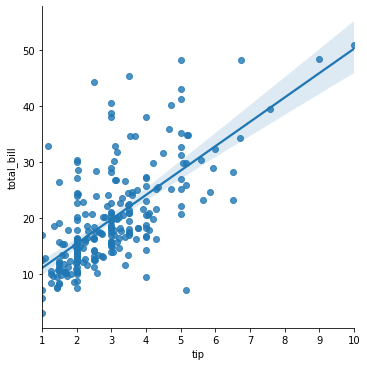

In [33]:
sns.lmplot(x="tip",y="total_bill",data=df);

### Güven Aralıkları

* Güven aralığı, istatistik biliminde bir anakütle parametresi için bir çeşit aralık kestirimi olup bir çıkarımsal istatistik çözüm aracıdır. Bir anakütle parametre değerinin tek bir sayı ile kestirimi yapılacağına, bu parametre değerini kapsayabilecek iki (alt ve üst sınır) sayıdan oluşan bir aralık bulunur. Böylece güven aralıkları bir kestirimin ne kadar güvenilir olduğunu gösterir.
* Anakütle parametresinin tahmini değerini kapsayabilecek iki sayıdan oluşan bir aralık bulunmasıdır.
* Genelde 95% güven aralığı seçilmektedir.
* Hesaplanırken n(birim sayısı), ortalama ve standart sapma kullanılmaktadır.

* Problem : 
    * CEO fiyat belirleme konusunda bilimsel bir dayanak ve esneklik istiyor.

* Detaylar:
    * Satıcı,alıcı ve bir ürün bulunmakta
    * Alıcılara ürüne ne kadar ücret öderdiniz diye soruluyor ve alıcılar birbirlerinin cevaplarından habersiz tutuluyor
    * Optimum fiyat bilimsel ve esnek olarak bulunmak isteniyor.

Fiyatları müşterilerden toplamış gibi varsayarak 5 ila 200 arasında 1000 gözlem oluşturuyoruz.

In [35]:
prices = np.random.randint(5,200,1000)

Bilimsel bir dayanağa göre fiyat belirlenmek sitenildiğinde en basit ve efektif yol ortalamayı almaktır. Fakat bu esneklik sağlamamaktadır.

In [36]:
prices.mean()

102.61

Burada esnekliği sağlayacak olan yöntem güven aralığıdır.<br>
**Güven aralığı hesaplamak için alttaki yolu izleriz.**

In [37]:
import statsmodels.stats.api as sms
sms.DescrStatsW(prices).tconfint_mean()

(99.14589303185839, 106.0741069681416)

Sonuç olarak 95% güven aralığıyla müşteriler 99 ila 106 lira arasında fiyat ödeyeceklerdir.
Kısacası 100 müşteriden 95inin ödeyeceği fiyat 99 ila 106 arasında olacaktır.

## Olasılığa Giriş

* Olasılık, olayların olabilirliğinin sayısal ifadesidir.
* Rassal değişken, değerlerini bir deneyin sonucundan alan değişkenlere denir.
* Dağılım, evrendeki gerçekleşen olayların veya durumların sayısal karşılıklarının ortaya çıkardığı yapıya denir.
* Olasılık dağılımı, bir rassal olaya ait değerler ve bu değerlerinin gerçekleşme olasılıklarının bir arade ifade edilmesine denir.
* Olasılık fonksiyonu, bir değişkenin herhangi bir değeri alması olasılığını hesaplamaya yarayan fonksiyondur.
* Olasılık Dağılımları :
    * Kesikli Olasılık Dağılımları
        * Bernoulli
        * Binom
        * Poisson
    * Sürekli Olasılık Dağılımları
        * Normal Dağılım
        * Uniform Dağılım
        * Üstel Dağılım

* #### Bernoulli Dağılımı

Başarılı-başarısız, olumlu-olumsuz şeklindeki binary olaylar ile ilgilenildiğinde kullanılan kesikli olasılık dağılımıdır.

$f(x;p) = p^x(1-p)^{1-x}$<br>
$x \in \{0,1\}$<br>
$E(X) = p$<br>
$Var(X) = pq = p(1-p)$<br>

Bernoulli dağılımını hesaplarken aradığımız değerin olasılığını bernoulli fonksiyonu içerisine verilir.<br>
Daha sonra Probability Mass Function üzerinden hangi değeri arıyorsak k parametresine vererek sonucu buluruz.

In [3]:
from scipy.stats import bernoulli

p = 0.634
rv = bernoulli(p)
rv.pmf(k = 1)

0.634

In [4]:
rv.pmf(k = 0)

0.36600000000000005

### Büyük Sayılar Yasası

Bir rassal değişkenin uzun vadeli kararlılığını belirleyen olasılık teoremidir.<br>
Büyük sayılar kanunu ya da büyük sayılar yasası, bir rassal değişkenin uzun vadeli kararlılığını tanımlayan bir olasılık teoremidir. Sonlu bir beklenen değere sahip birbirinden bağımsız ve eşit dağılıma sahip bir rassal değişkenler örneklemi verildiğinde, bu gözlemlerin ortalaması sonuçta bu beklenen değere yakınsayacak ve bu değere yakın bir seyir izleyecektir.<br>

Bir örnek olarak madeni para atılması olabilir. Bir madeni paranın peş peşe atılması durumunda, yazıların (ya da turaların) sıklığı, gözlem sayısı arttıkça, %50'e gittikçe yaklaşacaktır. Fakat yazı ve tura sayıları arasındaki mutlak fark atış sayısı arttıkça açılacaktır. Örneğin, 1000 atıştan sonra 520 ve 10000 atıştan sonra 5096 yazı görebiliriz. Ortalama ,52'den ,5096'ya gittiği, gerçek %50'ye yaklaştığı halde, ortalamadan toplam fark 40'tan 192'ye yükselmiştir.<br>

Büyük sayılar yasası önemlidir, çünkü rastgele olaylardan kararlı uzun-vadeli sonuçlar alınacağını "garanti eder". Örneğin, bir gazino tek bir Amerikan Rulet dönüşünden para kaybedebilir, ama 1000lerce dönüşe oynanan paranın tamamının %5,3'üne yakınını neredeyse kesin olarak kazanacaktır. Bir oyuncunun herhangi bir kazancı, sonuçta oyunun başlıca parametreleri tarafından soğurulacaktır. Büyük sayılar yasasının büyük sayıda gözlem yapıldığı zaman etkili olacağı unutulmamalıdır. Küçük miktardaki gözlem için sonucun beklenen değere yaklaşacağını veya bir sapmanın hemen bir başkasıyla "dengeleneceğini" beklemek için bir neden yoktur.

In [18]:
# Örnekleme olarak yazı turayı gerçekleştirelim.
import numpy as np
generator = np.random.RandomState(0)
for i in range(1,31):
    deney_sayisi = 2**i
    ornekler = generator.randint(0,2,deney_sayisi)
    tura_orani = ornekler.mean()
    print("Deney Sayisi : ",deney_sayisi," Tura Orani : %.2f" % (tura_orani * 100))

Deney Sayisi :  2  Tura Orani : 50.00
Deney Sayisi :  4  Tura Orani : 75.00
Deney Sayisi :  8  Tura Orani : 75.00
Deney Sayisi :  16  Tura Orani : 43.75
Deney Sayisi :  32  Tura Orani : 62.50
Deney Sayisi :  64  Tura Orani : 48.44
Deney Sayisi :  128  Tura Orani : 46.09
Deney Sayisi :  256  Tura Orani : 54.69
Deney Sayisi :  512  Tura Orani : 48.24
Deney Sayisi :  1024  Tura Orani : 51.46
Deney Sayisi :  2048  Tura Orani : 51.17
Deney Sayisi :  4096  Tura Orani : 50.24
Deney Sayisi :  8192  Tura Orani : 50.59
Deney Sayisi :  16384  Tura Orani : 49.55
Deney Sayisi :  32768  Tura Orani : 49.84
Deney Sayisi :  65536  Tura Orani : 50.06
Deney Sayisi :  131072  Tura Orani : 50.20
Deney Sayisi :  262144  Tura Orani : 49.87
Deney Sayisi :  524288  Tura Orani : 49.87
Deney Sayisi :  1048576  Tura Orani : 49.96
Deney Sayisi :  2097152  Tura Orani : 50.03
Deney Sayisi :  4194304  Tura Orani : 49.97
Deney Sayisi :  8388608  Tura Orani : 50.03
Deney Sayisi :  16777216  Tura Orani : 50.02
Deney Say

* #### Binom Dağılımı

Bağımsız n deneme sonucu, k başarılı olma olasılığı ile ilgilenildiğinde kullanılan dağılımdır.<br>
Olasılık kuramı ve istatistik bilim kollarında, binom dağılımı n sayıda iki kategori (yani başarı/başarısızlık, evet/hayır, 1/0 vb) sonucu veren denemelere uygulanır. Araştırıcının ilgi gösterdiği kategori başarı olarak adlandırılır. Bu türlü her bir deneyde, bağımsız olarak, başarı (=evet=1) olasılığının p olduğu (ve yalnızca iki kategori sonuç mümkün olduğu için başarısızlık olasılığının 1 - p olduğu) bilinir. Bu türlü bağımsız n sayıda denemeler serisi içinde elde edilen başarı sayısının ayrık olasılık dağılımı binom dağılım olarak tanımlanır. Bir binom dağılım sadece iki parametre ile, yani n ve p, ile tam olarak tanımlanır.<br>

$f(k;n,p) = \binom{n}{k}p^k(1-p)^{n-k}$<br>
$ k \in \{0,...,n\}$<br>
$n \geq 0$<br>
$E(X) = np$<br>
$Var(X) = np(1-p)$

Basit bir örnek olarak ; bir madeni para 4 kere atılıyor 2 kere yazı gelme olasılığı nedir?<br>
$f(2;4,0.5) = \binom{4}{2}(0.5)^2(1-0.5)^{4-2} = 0.375$<br>

In [21]:
# Bir reklama tıklanma oranı 0.01, 100 kişiden 1 ve 5 kişinin reklamı tıklama olasılığı nedir?
from scipy.stats import binom
p = 0.01
n = 100
rv = binom(n,p)
print(rv.pmf(1))
print(rv.pmf(5))

0.36972963764971983
0.0028977871237616114


* #### Poisson Dağılımı

Belirli bir zaman aralığında, belirli alanda nadiren rastlanan olayların olasılıklarını hesaplamak için kullanılır.<br>
$f(x,\lambda) = \lambda^xe^{-\lambda} / x!$<br>
$x = 0,1,2,...,n$<br>
$E(X) = \lambda$<br>
$Var(X) = \lambda$

Örnek verilebilecek olaylar;
* 10 bin kelimeden oluşan bir kitaptaki hatalı kelime sayısı
* 4k öğrencili okulda not girişinde hata yapılması
* Bir iş gününde çağrı merkezine gelen taktir sayısı

Poisson dağılımını;
* n büyük
* p küçük
olduğu zamanlarda kullanılır.

Bir olayın nadir olay kabul edilebilmesi için;
* n > 50
* n*p < 5 
ise bu duruma nadir olay yorumu yapılır.

* Rassal denemeler iki sonuçlu olmalıdır.
* Aynı koşullar altında gerçekleştirilmelidir.
* Rassal denemeler birbirinden bağımsız olmalıdır.

In [26]:
# İlan sitesinde 1 yıl boyunca hata değerleri hesaplanmış ve lambda 0.1 bulunmuştur. Hiç hata olmama ve 3 kez hata olma durumlarını bulunuz.
from scipy.stats import poisson
lambda_ = 0.1
rv = poisson(mu = lambda_)
print(rv.pmf(0))
print(rv.pmf(3))

0.9048374180359595
0.00015080623633932676


* #### Normal Dağılım

Normal dağılım, aynı zamanda Gauss dağılımı veya Gauss tipi dağılım olarak isimlendirilen, birçok alanda pratik uygulaması olan, çok önemli bir sürekli olasılık dağılım ailesidir.<br>

Bu dağılım ailesinin her bir üyesi sadece iki parametreyle tam olarak tanımlanabilir: Bunlar konum gösteren ortalama (μ, aritmetik ortalama) ve ölçek gösteren varyans (σ2, "yayılım")dır.<br>

Normal dağıldığı bilinen sürekli rassal değişkenler için olasılık hesaplaması için kullanacağız.

$f(x|\mu,\sigma^2) = \dfrac{1}{\sqrt{2\pi\sigma^2}} e^{-\dfrac{{(x-\mu)}^2}{2\sigma^2}}$

Örnek olarak yıllık satış ortalamasının 80K olduğu firmada gelecek yıl için tahminler yapılıyor.<br>
80K ortalama, 5 Standart Sapma değeri ve noraml bir dağılım gösterildiği biliniyor.
* 90K'dan fazla satış yapma
* 70K'dan fazla satış yapma
* 73K'dan az satış yapma
* 90 ila 85K arası satış yapma olasılıkları nelerdir?

Burada cdf fonksiyonu Cumulative Density Function'dır. Normal dağılımda eğrinin altında kalan alan bize olasılığı verdiği için integral alarak değerlerimizi bulmaktayız. Bu sonuç sürekli bir alanı temsil ettiği için cdf fonksiyonu kullanılır.

In [28]:
from scipy.stats import norm
1 - norm.cdf(90,80,5)

0.02275013194817921

Normal dağılım fonksiyonunu kullanırken cdf'ye parametre olarak sırasıyla **beklenen değer,ortalama ve standart sapma** verilir.

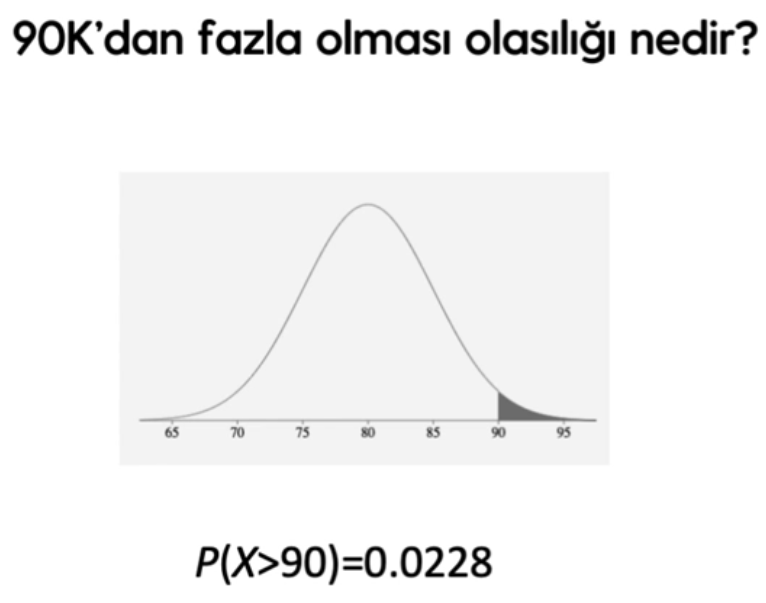

In [29]:
1- norm.cdf(70,80,5)

0.9772498680518208

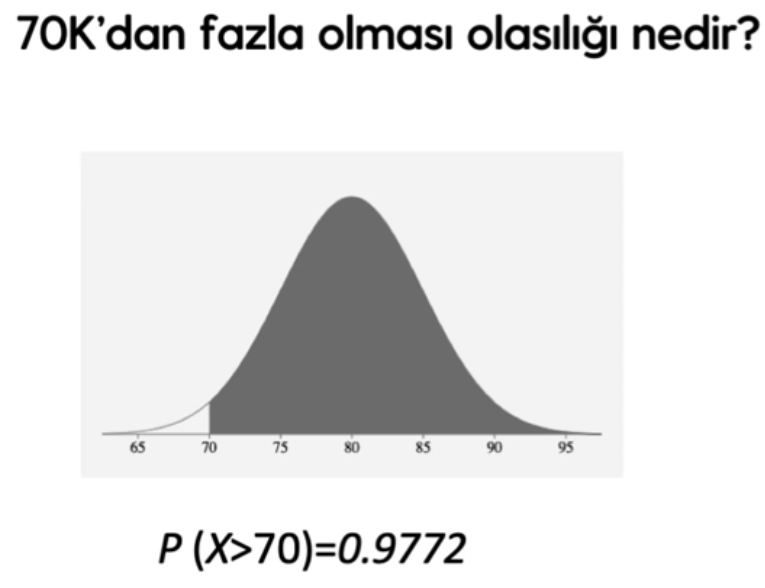

In [30]:
norm.cdf(73,80,5)

0.08075665923377107

In [32]:
norm.cdf(90,80,5) - norm.cdf(85,80,5)

0.13590512198327787

## Hipotez Testleri

* Populasyonun parametreleri( $\mu$ (Ortalama), $\sigma$ (Standart Sapma), $\sigma^2$ (Varyans), $p$ (Oran)) ile ilgili herhangi bir iddia atıldığında bu iddianın doğruluğu hipotez testi ile test edilir.
* Hipoteztinin amacı populasyon parametreleriyle iligili ortaya atılmış bir iddianın doğruluğunu örneklem verilerini kullanarak belirlemektir.

#### Sıfır ve Alternatif Hipotez

* Populasyon üzerine bir **iddia** atılır.
* Bu iddia üzerinden iki adet hipotez oluşturulur. Bunlar $H_0$ Sıfır Hipotezi, $H_1$ Alternatif hipotezdir.
* $H_1$ hipotezi
    * Daima populasyon üzerine atılan iddiayı içermelidir.
    * Örneklemden elde edilen değer ile populasyonun bilinen değeri arasında fark yoktur anlamı taşımaktadır.
* $H_0$ hipotezi
    * Daima iddia içerisinde geçen sayıya eşit olmalıdır.
    * Örneklemden elde edilen değer ile populasyonun bilinen değeri arasında önemli bir fark vardır anlamı taşımaktadır.

İddia : bir populasyonun ortalaması 5'ten küçüktür.
* $H_0$ için $\mu = 5$
* $H_1$ için $\mu < 5$

Burada oluşturulan iddialar populasyon üzerinedir, bu sebeple $H_0$ ve $H_1$ hipotezlerinin karşısında mutlaka ve mutlaka populasyon parametrelerini göreceğiz.
**Örneklem parametreleriyle kesinlikle hipotez oluşturulmaz**

Hipotez testinde, bir hipotez ile onun karşıtı olan hipotezden hangisinin örneklemden elde edilen sonuçlar ile daha iyi bağdaştığı araştırılmaktadır.

#### Hipotezlerin Kuruluşu

$\mu_0$ soruda verilen değerdir.
* 1.çeşit
    * $H_0 : \mu = \mu_0$
    * $H_1 : \mu \neq \mu_0$
    * Çift Taraflıdır
* 2.çeşit
    * $H_0 : \mu = \mu_0$
    * $H_1 : \mu > \mu_0$
    * Tek Taraflıdır
* 3.çeşit
    * $H_0 : \mu = \mu_0$
    * $H_1 : \mu < \mu_0$
    * Tek Taraflıdır

* Bir hastalıkta ortalama iyileşme süresinin 10 günden az olduğu iddia ediliyor.<br>
$H_0 : \mu = 10$<br>
$H_1 : \mu < 10$<br>

#### Anlamlılık Düzeyi (Significance Level)

* Anlamlılık düzeyi bize hipotez testinin kalitesini göstermektedir.
* $\alpha$ ile temsil edilmektedir.
* $\alpha$ değeri genelde %5 olarak alınır. Bu değer arttıkça hipotezin kalitesi düşer ve zorlama olarak görülür. Bu değer küçüldükçe hipotezin doğruluk yüzdesi artar.
* Bu değer kritik bölgeyi ve kritik değeri bulurken bize yardımcı olur.
* %95 güven düzeyi deniyorsa $\alpha$ değerimiz %5 olmaktadır.

#### Kritik Bölge

* Anlamlılık düzeyinden elde edilir.
* Ret bölgesi olarak da söylenebilir.
* $H_0$ hipotezinin reddedildiği bölgedir.
* 3 çeşidi vardır. Bu farklılığı hipotez testinin kuruluşundan farklılık oluşturulur.

$\alpha = 0,05$
* 1.çeşit:
    * $H_0 : \mu = 10$<br>
    * $H_1 : \mu < 10$<br>
    * 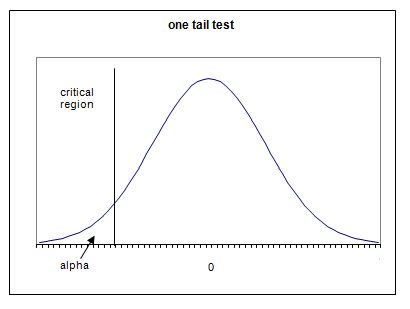
    
* 2.çeşit:
    * $H_0 : \mu = 10$<br>
    * $H_1 : \mu > 10$<br>
    * 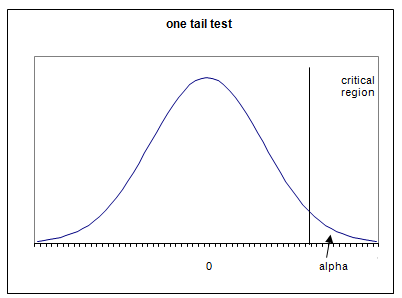
    
* 3.çeşit:
    * $H_0 : \mu = 10$<br>
    * $H_1 : \mu \neq 10$<br>
    * 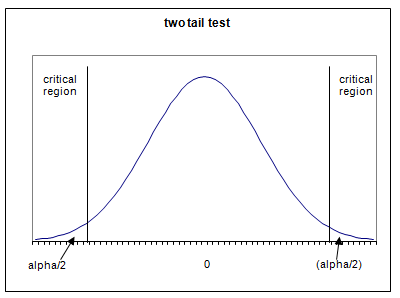

#### Kritik Değer

* Hipotez testinde kritik bölgesini(ret bölgesi) kabul bölgesinden ayıran değere denir.
* 4 adet örneklem dağılımından biri ile hesaplanır. Bunlar;
    * $z, t, \chi^2, F$ tablolarından bulunur.

#### Test İstatistiği

* Hangi dağılım kullanılacağı belirlenmelidir.
* 4 adet tablonun her birinde farklı bir formüle sahiptir.
* Örnek olarak $z_{test} = \dfrac{x-\mu}{\dfrac{\sigma}{\sqrt{n}}} $
* Eğer $z_{test}$ değeri ret bölgesinin içine düşerse $H_0$ hipotezi ret edilir. $H_1$ hipotezi kabul edilir.
* Eğer $z_{test}$ değeri kabul bölgesinin içine düşerse $H_0$ hipotezi not rejected olur. $H_1$ hipotezi hatalı, hpotezi yeni koşullarda tekrardan oluşturmak gerekir.

#### Type I and II Error

In [15]:
import pandas as pd
pd.DataFrame([["I.Tip Hata","Doğru Karar"],["Doğru Karar","II.Tip Hata"]],columns=["$H_0$ Doğru","$H_0$ Yanlış"], index=["$H_0$ Red","$H_0$ Kabul"])

,$H_0$ Doğru,$H_0$ Yanlış
$H_0$ Red,I.Tip Hata,Doğru Karar
$H_0$ Kabul,Doğru Karar,II.Tip Hata


* Satırlar **Test Sonucu**, Sütünlar ise **Gerçek Durumu** temsil etmektedir.
* P(1.Tip Hata) = $\alpha$ yani 1.tip hatanın oluşma olasılığı anlamlılık düzeyine eşittir.
* P(2.Tip Hata) = $\beta$ yani $\beta$ kabul bölgesine düşmüştür.

#### Hipotez Testinin Gücü

* $H_0$ hipotezi yanlış iken onun reddedilmesi olasılığı testin gücüdür.
* Araştırmamızda **doğru karar** verme olasılığımızdır.
* $1-\beta$ ile hesaplanır.

#### Hipotez Testinin Uygulanma Adımları

* **1.adım :** Hipotezler oluşturulmalıdır. $H_0$ , $H_1$
* **2.adım :** Anlamlılık düzeyi $\alpha$ belirlenmeli ve hipotezlerin kuruluşuna göre ret bölgesi ve kabul bölgesi çizimi yapılmalıdır.
* **3.adım :** Örneklem dağılımının belirlenmesi, hangi tabloyu kullanacağımızı belirleyeceğiz. $z, t, \chi^2, F$
* **4.adım :** Bu örneklem dağılımından Kritik Değer elde edilmeli ve dolayısıyla ret bölgesi belirlenmelidir.
* **5.adım :** Test istatistiği hesaplanmalıdır. Her bir örneklem dağılımında farklı formüle sahiptir.
* **6.adım :** Kritik değer ile test değeri karşılaştılarak $H_0$ reddedilememesi ya da reddedilmesi belirlenir.

#### Hipotez Testinde Örneklem Dağılımını Belirleyen Çeşitler

* **1.çeşit :** Populasyon Ortalamasının Hipotez Testi $\mu$
    * Populasyonun varyansı biliniyorken $\sigma^2$ $\Rightarrow$ **z tablosu**
    * Populasyonun varyansı bilinmiyorken ve n $\geq$ 30 $\Rightarrow$ **z tablosu**
    * Populasyon varyansı bilinmiyorken ve n $\leq$ 30 $\Rightarrow$ **t tablosu**
* **2.çeşit :** Populasyon Oranının Hipotez Testi $p$ $\Rightarrow$ **z tablosu**
* **3.çeşit :** Populasyon Varyansının Hipotez Testi $\sigma^2$ $\Rightarrow$ **$\chi^2$ tablosu**
* **4.çeşit :** Eşlendirilmiş Gözlemler için Ortalamanın Farkı(Md) Hipotez Testi $\Rightarrow$ **t tablosu**
* **5.çeşit :** Populasyon Ortalamalarının Farkı için Hipotez Testi $\mu_1 - \mu_2$ $\Rightarrow$ **t tablosu**
    * Populasyon varyansları biliniyorken ($\sigma_1^2$,$\sigma_2^2$) $\Rightarrow$ **z tablosu**
    * Populasyon varyansları bilinmiyorken (Varyanslar eşit kabul edilir) $\Rightarrow$ **t tablosu**
    * Populasyon varyansları bilinmiyorken (Varyanslar eşit kabul edilmemesi) $\Rightarrow$ **t tablosu**
* **6.çeşit :** İki Populasyon Oranının Hipotez Testi $p_1 - p_2$ $\Rightarrow$ **z tablosu**
* **7.çeşit :** İki Populasyon Varyansının Oranı için Hipotez Testi $\dfrac{\sigma_1^2}{\sigma_2^2}$ $\Rightarrow$ **F tablosu**